# NLP Disater Twitts

Kaggle competition with the purpose to predict natural disaters from the Twetts written in Twitter.

Dataset url: https://www.kaggle.com/c/nlp-getting-started/data 

### Importing libraries and datasets

In [1]:
import urllib.request 
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
response = urllib.request.urlopen('https://www.python.org')
# print(response.read().decode('utf-8'))

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
target_train = train['target']

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.shape

(7613, 5)

In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
test.shape

(3263, 4)

In [7]:
target_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Preliminar visualization of the datasets

Let us count the target values and visualize the relationship between words and target values. Then will know which words are more related with disasters and which not.

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


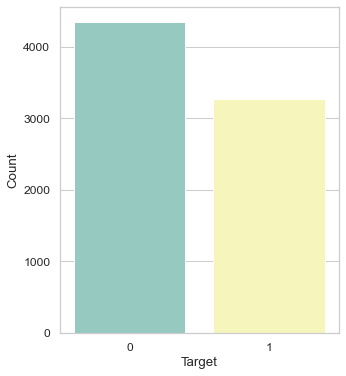

In [8]:
target_df=target_train.to_frame(name='target')
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [5, 6]})
sns.countplot(target_df['target'],color='r',palette="Set3").set(xlabel='Target', ylabel='Count');

The dataset is inbalanced. This can be fixed merging both train and test datasets.

In [9]:
# Merging train and test data
merge_data = pd.concat([train.drop(['target'], axis=1), test])
merge_data.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [10]:
merge_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [11]:
# Remove null values in "keyword" column
merge_data = merge_data[pd.notnull(merge_data["keyword"])]
merge_data.isnull().sum()

id             0
keyword        0
location    3551
text           0
dtype: int64

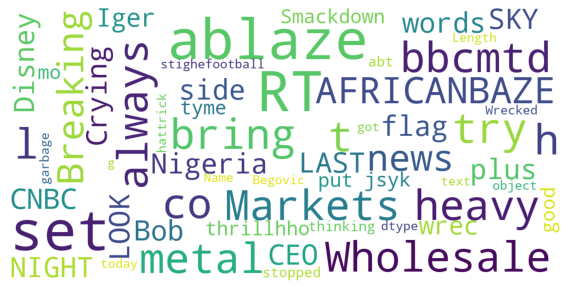

In [12]:
# Text Visualization
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(merge_data["text"])

### Filtering Stop Words

In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

# Non-alphanumeric & non printable characters
merge_data["text"] = merge_data["text"].replace(r"[^a-zA-Z0-9]", '', regex=True)

# E-mail address
merge_data["text"]=merge_data["text"].replace(r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|'(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*')@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])", ' ',regex=True)

#Numeric characters
merge_data["text"]=merge_data["text"].replace(r"[.+\d. +]", ' ',regex=True)

#URLs
merge_data["text"]=merge_data["text"].replace(r"/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", ' ',regex=True)

# Convert all characters to lowercase
merge_data["text"] = merge_data["text"].str.lower()

# Removing stop words
merge_data["text"] = merge_data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Multiple whitespaces to one
merge_data["text"]=merge_data["text"].str.strip()

merge_data

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xavier/snap/jupyter/6/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,keyword,location,text
31,48,ablaze,Birmingham,bbcmtdwholesalemarketsablazehttptcolhyxeohy c
32,49,ablaze,Est. September 2012 - Bristol,wealwaystrytobringtheheavymetalrthttptcoyao e ...
33,50,ablaze,AFRICA,africanbazebreakingnewsnigeriaflagsetablazeina...
34,52,ablaze,"Philadelphia, PA",cryingoutformoresetmeablaze
35,53,ablaze,"London, UK",onplussidelookattheskylastnightitwasablazehttp...
...,...,...,...,...
3247,10806,wrecked,Seattle Washington,rtcnbc wordsfromdisneyceobobigerwreckeddisneys...
3248,10807,wrecked,Acey mountain islanddåÇTorontoåÈ,smackdowntymethisshouldputmeinagoodmoodagainsi...
3249,10816,wrecked,los angeles,thrillhhojsykihaventstoppedthinkingabtremusslu...
3250,10820,wrecked,"Brussels, Belgium",stighefootballbegovichasbeengarbagehegotwrecke...


In [14]:
# Unique text in "keyword" column
merge_data["keyword"].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

### Encoding text data

In [15]:
#merge_data = merge_data.drop(['id'], axis=1)
merge_data = merge_data.drop(['location'], axis=1)

from category_encoders import BinaryEncoder

be = BinaryEncoder(cols=['keyword'])
newcolumns = be.fit_transform(merge_data['keyword'])
merge_data = pd.concat([merge_data,newcolumns], axis=1)
merge_data

,id,keyword,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8
31,48,ablaze,bbcmtdwholesalemarketsablazehttptcolhyxeohy c,0,0,0,0,0,0,0,0,1
32,49,ablaze,wealwaystrytobringtheheavymetalrthttptcoyao e ...,0,0,0,0,0,0,0,0,1
33,50,ablaze,africanbazebreakingnewsnigeriaflagsetablazeina...,0,0,0,0,0,0,0,0,1
34,52,ablaze,cryingoutformoresetmeablaze,0,0,0,0,0,0,0,0,1
35,53,ablaze,onplussidelookattheskylastnightitwasablazehttp...,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3247,10806,wrecked,rtcnbc wordsfromdisneyceobobigerwreckeddisneys...,0,1,1,0,1,1,1,0,1
3248,10807,wrecked,smackdowntymethisshouldputmeinagoodmoodagainsi...,0,1,1,0,1,1,1,0,1
3249,10816,wrecked,thrillhhojsykihaventstoppedthinkingabtremusslu...,0,1,1,0,1,1,1,0,1
3250,10820,wrecked,stighefootballbegovichasbeengarbagehegotwrecke...,0,1,1,0,1,1,1,0,1


In [16]:
merge_data = merge_data.drop(['keyword'], axis=1)

In [17]:
merge_data.columns

Index(['id', 'text', 'keyword_0', 'keyword_1', 'keyword_2', 'keyword_3',
       'keyword_4', 'keyword_5', 'keyword_6', 'keyword_7', 'keyword_8'],
      dtype='object')

In [18]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 31 to 3251
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10789 non-null  int64 
 1   text       10789 non-null  object
 2   keyword_0  10789 non-null  int64 
 3   keyword_1  10789 non-null  int64 
 4   keyword_2  10789 non-null  int64 
 5   keyword_3  10789 non-null  int64 
 6   keyword_4  10789 non-null  int64 
 7   keyword_5  10789 non-null  int64 
 8   keyword_6  10789 non-null  int64 
 9   keyword_7  10789 non-null  int64 
 10  keyword_8  10789 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1011.5+ KB


### TF-IDF
Measuring text groups by frequency TF (Term Frequency) and by importance with IDF (Inverse Document Frequency)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
tfidf_result = tfidf.fit_transform(merge_data["text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = merge_data.index
merge_data = pd.concat([merge_data, tfidf_df], axis=1)

In [20]:
merge_data.head()

,id,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,...,word_zo,word_zp,word_zr,word_zs,word_ztaxiwaysfoxtrot,word_zu,word_zw,word_zx,word_zy,word_zz
31,48,bbcmtdwholesalemarketsablazehttptcolhyxeohy c,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,49,wealwaystrytobringtheheavymetalrthttptcoyao e ...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,50,africanbazebreakingnewsnigeriaflagsetablazeina...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,52,cryingoutformoresetmeablaze,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,53,onplussidelookattheskylastnightitwasablazehttp...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
merge_data.columns

Index(['id', 'text', 'keyword_0', 'keyword_1', 'keyword_2', 'keyword_3',
       'keyword_4', 'keyword_5', 'keyword_6', 'keyword_7',
       ...
       'word_zo', 'word_zp', 'word_zr', 'word_zs', 'word_ztaxiwaysfoxtrot',
       'word_zu', 'word_zw', 'word_zx', 'word_zy', 'word_zz'],
      dtype='object', length=1011)

In [22]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 31 to 3251
Columns: 1011 entries, id to word_zz
dtypes: float64(1000), int64(10), object(1)
memory usage: 83.3+ MB


### Resampling the inbalance dataset using SMOT ( Synthetic Minority Oversampling Technique)

In [23]:
### Resampling the dataset to balance it 
# Using SMOT

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=1,
                          n_clusters_per_class=1, class_sep=0.9)
X.shape

(10000, 2)

In [24]:
y.shape

(10000,)

In [25]:
# test_size = 0.3263 to match with sample_submission.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3263, random_state=42, stratify=y)
X_train.shape
y_test.shape

(3263,)

In [26]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
print('After over-sampling:\n')
print('The shape of train_X: {}'.format(X_train.shape)) 
print('The shape of train_y: {}'.format(y_train.shape)) 
  
print("Counts of label '1': {}".format(sum(y_train == 1))) 
print("Counts of label '0': {}".format(sum(y_train == 0)))

After over-sampling:

The shape of train_X: (6738, 2)
The shape of train_y: (6738,)
Counts of label '1': 3369
Counts of label '0': 3369


In [27]:
X_train

array([[ 1.97940268, -1.41482487],
       [ 1.43404364, -0.70125505],
       [-1.18057764,  1.93184262],
       ...,
       [-1.27991742,  0.50059408],
       [ 0.43921723,  1.8857047 ],
       [-0.95423641,  1.96202989]])

In [28]:
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [29]:
X

array([[-0.02201859, -2.31448619],
       [-0.50939725, -0.17072873],
       [-0.59973915, -2.22286597],
       ...,
       [-0.0300648 ,  0.38074704],
       [-1.1170304 ,  0.66720064],
       [ 0.32710929,  0.99803261]])

## Model Selection

### Logistic Regression

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [38]:
log_reg.classes_

array([0, 1])

In [39]:
log_reg.score(X_train, y_train)

0.9021964974769962

In [40]:
log_reg.score(X_test, y_test)

0.9013178057002759

Similar accuracies for train and test datasets, apparently there is no overfitting.

In [41]:
# Confucion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1498,  133],
       [ 189, 1443]])

In [42]:
# Compute metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

log_reg_precision = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_f1score = f1_score(y_test, y_pred)

print("precision: ", log_reg_precision)
print("recall: ", log_reg_recall)
print("f1-score", log_reg_f1score)

precision:  0.9156091370558376
recall:  0.8841911764705882
f1-score 0.8996259351620948


In [43]:
# AUC
auc_log_reg = roc_auc_score(y_test, y_pred)
auc_log_reg

0.901323056046453

In [44]:
# ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred)

In [45]:
report_log_reg = classification_report(y_test, y_pred)
print(report_log_reg)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1631
           1       0.92      0.88      0.90      1632

    accuracy                           0.90      3263
   macro avg       0.90      0.90      0.90      3263
weighted avg       0.90      0.90      0.90      3263



### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = dec_tree.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
dec_tree.score(X_train, y_train)

1.0

In [49]:
dec_tree.score(X_test, y_test)

0.8522831749923383

In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1631
           1       0.85      0.85      0.85      1632

    accuracy                           0.85      3263
   macro avg       0.85      0.85      0.85      3263
weighted avg       0.85      0.85      0.85      3263



In [51]:
dec_tree_precision = precision_score(y_test, y_pred)
dec_tree_recall = recall_score(y_test, y_pred)
dec_tree_f1score = f1_score(y_test, y_pred)

print("precision: ", dec_tree_precision)
print("recall: ", dec_tree_recall)
print("f1-score", dec_tree_f1score)

precision:  0.854064039408867
recall:  0.8498774509803921
f1-score 0.851965601965602


In [52]:
# AUC 
auc_dec_tree = roc_auc_score(y_test, y_pred)
auc_dec_tree 

0.8522839124920355

In [53]:
# ROC
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = roc_curve(y_test, y_pred)

### Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(dec_tree,
                                    n_estimators=50,
                                    max_samples=0.5,
                                    bootstrap=True,
                                    random_state=355, oob_score=True)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=50, oob_score=True, random_state=355)

In [55]:
y_pred = bagging.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [56]:
bagging.score(X_train, y_train)

0.9591867022855447

In [57]:
bagging.score(X_test, y_test)

0.8869138829298192

In [58]:
bagging_precision = precision_score(y_test, y_pred)
bagging_recall = recall_score(y_test, y_pred)
bagging_f1score = f1_score(y_test, y_pred)

print("precision: ", bagging_precision)
print("recall: ", bagging_recall)
print("f1-score", bagging_f1score)

precision:  0.907682375726275
recall:  0.8615196078431373
f1-score 0.8839987425337944


In [59]:
#AUC
auc_bagging = roc_auc_score(y_test, y_pred)
auc_bagging

0.8869216678087545

In [60]:
# ROC
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_pred)

### Passing

In [61]:
passing = BaggingClassifier(dec_tree,
                                    n_estimators=50,
                                    max_samples=0.5,
                                    bootstrap=False,
                                    random_state=355)
passing.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=0.5, n_estimators=50, random_state=355)

In [62]:
y_pred = passing.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [63]:
passing.score(X_train, y_train)

0.98337785693084

In [64]:
passing.score(X_test, y_test)

0.8875268158136684

In [65]:
passing_precision = precision_score(y_test, y_pred)
passing_recall = recall_score(y_test, y_pred)
passing_f1score = f1_score(y_test, y_pred)

print("precision: ", passing_precision)
print("recall: ", passing_recall)
print("f1-score", passing_f1score)

precision:  0.9088558500323206
recall:  0.8615196078431373
f1-score 0.8845548914753067


In [66]:
# AUC
auc_passing = roc_auc_score(y_test, y_pred)
auc_passing

0.8875347885935491

In [67]:
# ROC
fpr_passing, tpr_passing, thresholds_passing = roc_curve(y_test, y_pred)

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = rand_forest.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
rand_forest.score(X_train, y_train)

1.0

In [71]:
rand_forest.score(X_test, y_test)

0.8841556849524977

In [72]:
rand_forest_precision = precision_score(y_test, y_pred)
rand_forest_recall = recall_score(y_test, y_pred)
rand_forest_f1score = f1_score(y_test, y_pred)

print("precision: ", rand_forest_precision)
print("recall: ", rand_forest_recall)
print("f1-score", rand_forest_f1score)

precision:  0.9034749034749034
recall:  0.8602941176470589
f1-score 0.8813559322033898


In [73]:
# AUC
auc_rand_forest = roc_auc_score(y_test, y_pred)
auc_rand_forest

0.8841629999639341

In [74]:
# ROC
fpr_rand_forest, tpr_rand_forest, thresholds_rand_forest = roc_curve(y_test, y_pred)

### XGBoost

In [75]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(objective='binary:logistic')
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred = xgboost.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [77]:
xgboost.score(X_train, y_train)

0.9436034431582072

In [78]:
xgboost.score(X_test, y_test)

0.8872203493717438

In [79]:
xgboost_precision = precision_score(y_test, y_pred)
xgboost_recall = recall_score(y_test, y_pred)
xgboost_f1score = f1_score(y_test, y_pred)

print("precision: ", xgboost_precision)
print("recall: ", xgboost_recall)
print("f1-score", xgboost_f1score)

precision:  0.9119947848761408
recall:  0.8572303921568627
f1-score 0.8837650031585597


In [80]:
# AUC
auc_xgboost = roc_auc_score(y_test, y_pred)
auc_xgboost

0.8872295431047955

In [81]:
# ROC
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred)

### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [84]:
knn.score(X_train, y_train)

0.9161472246957554

In [85]:
knn.score(X_test, y_test)

0.8853815507201961

In [86]:
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1score = f1_score(y_test, y_pred)

print("precision: ", knn_precision)
print("recall: ", knn_recall)
print("f1-score", knn_f1score)

precision:  0.8996188055908514
recall:  0.8676470588235294
f1-score 0.8833437305053026


In [87]:
# AUC
auc_knn = roc_auc_score(y_test, y_pred)
auc_knn

0.8853869874129909

In [88]:
# ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred)

### Support Vector Machines

In [89]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [90]:
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [91]:
svm.score(X_train, y_train)

0.9075393291777976

In [92]:
svm.score(X_test, y_test)

0.9000919399325774

In [93]:
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1score = f1_score(y_test, y_pred)

print("precision: ", svm_precision)
print("recall: ", svm_recall)
print("f1-score", svm_f1score)

precision:  0.9330238726790451
recall:  0.8621323529411765
f1-score 0.8961783439490445


In [94]:
# AUC
auc_svm = roc_auc_score(y_test, y_pred)
auc_svm

0.9001035768384608

In [95]:
# ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred)

### Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [97]:
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [98]:
nb.score(X_train, y_train)

0.9054615612941526

In [99]:
nb.score(X_test, y_test)

0.9031566043518234

In [100]:
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1score = f1_score(y_test, y_pred)

print("precision: ", nb_precision)
print("recall: ", nb_recall)
print("f1-score", nb_f1score)

precision:  0.9283854166666666
recall:  0.8737745098039216
f1-score 0.9002525252525252


In [101]:
# AUC
auc_nb = roc_auc_score(y_test, y_pred)
auc_nb

0.9031656117382576

In [102]:
# ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)

### Linear Discriminant Analysis

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [104]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [105]:
lda.score(X_train, y_train)

0.9057583852775304

In [106]:
lda.score(X_test, y_test)

0.8979466748391051

In [107]:
lda_precision = precision_score(y_test, y_pred)
lda_recall = recall_score(y_test, y_pred)
lda_f1score = f1_score(y_test, y_pred)

print("precision: ", lda_precision)
print("recall: ", lda_recall)
print("f1-score", lda_f1score)

precision:  0.94213750850919
recall:  0.8480392156862745
f1-score 0.8926152853918091


In [108]:
# AUC
auc_lda = roc_auc_score(y_test, y_pred)
auc_lda

0.8979619744893667

In [109]:
# ROC
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred)

## Models Comparison

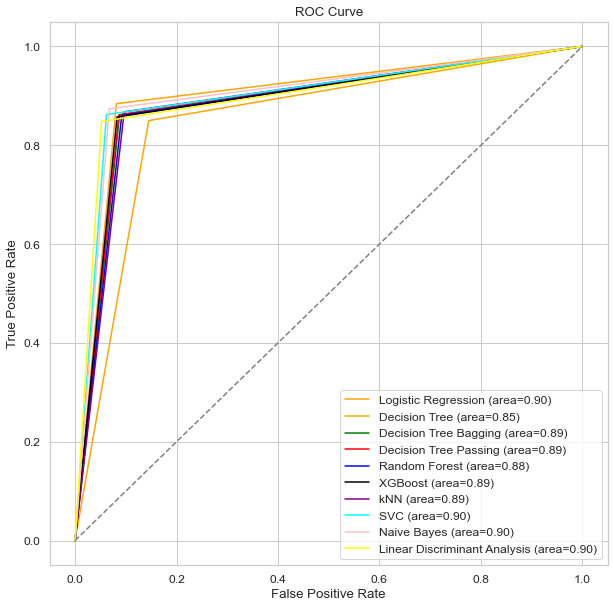

In [110]:
fig = plt.figure(figsize=(10,10))

plt.plot(fpr_log_reg,tpr_log_reg, color='orange', label='Logistic Regression (area=%0.2f)' % auc_log_reg)
plt.plot(fpr_dec_tree,tpr_dec_tree, color='orange', label='Decision Tree (area=%0.2f)' % auc_dec_tree)
plt.plot(fpr_bagging,tpr_bagging, color='green',
         label='Decision Tree Bagging (area=%0.2f)' % auc_bagging)
plt.plot(fpr_passing,tpr_passing, color='red',
         label='Decision Tree Passing (area=%0.2f)' % auc_passing)
plt.plot(fpr_rand_forest,tpr_rand_forest, color='blue',
         label='Random Forest (area=%0.2f)' % auc_rand_forest)
plt.plot(fpr_xgboost,tpr_xgboost, color='black',
         label='XGBoost (area=%0.2f)' % auc_xgboost)
plt.plot(fpr_knn,tpr_knn, color='purple',
         label='kNN (area=%0.2f)' % auc_knn)
plt.plot(fpr_svm,tpr_svm, color='cyan',
         label='SVC (area=%0.2f)' % auc_svm)
plt.plot(fpr_nb,tpr_nb, color='pink',
         label='Naive Bayes (area=%0.2f)' % auc_nb)
plt.plot(fpr_lda,tpr_lda, color='yellow',
         label='Linear Discriminant Analysis (area=%0.2f)' % auc_lda)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Results

In [111]:
results = pd.DataFrame()

results['Models'] = ['Logistic Regression',
                     'Decision Tree',
                     'Decision Tree Bagging',
                    'Decision Tree Passing',
                     'Random Forest',
                     'XGBoost',
                     'KNN',
                    'SVC',
                     'Naive Bayes',
                     'Linear Discriminat Analysis']

results['Accuracy'] = [auc_log_reg,
                       auc_dec_tree,
                       auc_bagging,
                       auc_passing,
                       auc_rand_forest,
                      auc_xgboost,
                       auc_knn,
                       auc_svm,
                       auc_nb,
                       auc_lda]

results['Precision'] = [log_reg_precision,
                       dec_tree_precision,
                       bagging_precision,
                       passing_precision,
                       rand_forest_precision,
                       xgboost_precision,
                       knn_precision,
                       svm_precision,
                       nb_precision,
                       lda_precision]

results['Recall'] = [log_reg_recall,
                    dec_tree_recall,
                    bagging_recall,
                    passing_recall,
                    rand_forest_recall,
                    xgboost_recall,
                    knn_recall,
                    svm_recall,
                    nb_recall,
                    lda_recall]

results['F1-score'] = [log_reg_f1score,
                      dec_tree_f1score,
                      bagging_f1score,
                      passing_f1score,
                       rand_forest_f1score,
                      xgboost_f1score,
                      knn_f1score,
                      svm_f1score,
                      nb_f1score,
                      lda_f1score]

results

,Models,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.901323,0.915609,0.884191,0.899626
1,Decision Tree,0.852284,0.854064,0.849877,0.851966
2,Decision Tree Bagging,0.886922,0.907682,0.861520,0.883999
3,Decision Tree Passing,0.887535,0.908856,0.861520,0.884555
4,Random Forest,0.884163,0.903475,0.860294,0.881356
5,XGBoost,0.887230,0.911995,0.857230,0.883765
6,KNN,0.885387,0.899619,0.867647,0.883344
7,SVC,0.900104,0.933024,0.862132,0.896178
8,Naive Bayes,0.903166,0.928385,0.873775,0.900253
9,Linear Discriminat Analysis,0.897962,0.942138,0.848039,0.892615


### K-fold Cross Validation

LR: 0.902194 (0.014626)
DT: 0.858862 (0.011072)
DTbagging: 0.896112 (0.012036)
DTpassing: 0.894181 (0.012742)
RF: 0.896110 (0.012687)
XGBoost: 0.895073 (0.011795)
KNN: 0.891953 (0.011249)
SVM: 0.906350 (0.013802)
NB: 0.905755 (0.014121)
LDA: 0.905905 (0.012595)


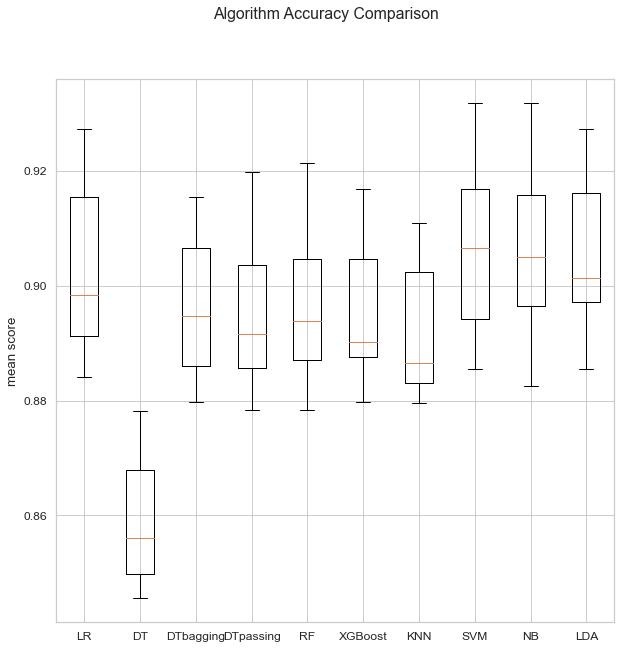

In [148]:
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', log_reg))
models.append(('DT', dec_tree))
models.append(('DTbagging', bagging))
models.append(('DTpassing', passing))
models.append(('RF', rand_forest))
models.append(('XGBoost', xgboost))
models.append(('KNN', knn))
models.append(('SVM', svm))
models.append(('NB', nb))
models.append(('LDA', lda))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("results for k=10:")
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("mean score")
ax.set_xticklabels(names)
plt.show()

All accuracies are very similar except Decision Tree.

### Stacking

Stacking is an ensemble technique where a meta-model is built based on models with less performance to increase the overall accuracy. The predicitons of those models are used as an input features of the meta-model to train on and give prediction.

Let's implement stacking to improve the accuracy of our dataset prediction.

In [151]:
X

array([[-0.02201859, -2.31448619],
       [-0.50939725, -0.17072873],
       [-0.59973915, -2.22286597],
       ...,
       [-0.0300648 ,  0.38074704],
       [-1.1170304 ,  0.66720064],
       [ 0.32710929,  0.99803261]])

In [152]:
# Divide the dataset into training set and hold out set by 50%
train, val_train, test, val_test = train_test_split(X, y, test_size=0.5, random_state=3)

print(len(train))
print(len(val_train))
print(len(test))
print(len(val_test))

5000
5000
5000
5000


In [153]:
# Splitting the training set into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=4)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3500
1500
3500
1500


Base models: KNN and SVM.

In [154]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9026666666666666

In [155]:
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9186666666666666

In [156]:
# Predictions of all the base models on the validation sets
predict_val1 = knn.predict(val_train)
predict_val2 = svm.predict(val_train)

In [157]:
# stack predictions for validation set together
predict_val = np.column_stack((predict_val1, predict_val2))
#predict_val

In [158]:
# Prediction of text models on the test set
predict_test1 = knn.predict(x_test)
predict_test2 = svm.predict(x_test)

In [159]:
# Stacking predicitons for validation
predict_test = np.column_stack((predict_test1, predict_test2))
#predict_test

In [160]:
# Let use the predict_val data for a Random Forest meta-model
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [161]:
rand_clf.score(predict_test, y_test)

0.9186666666666666

There is no improvement. let's try hyperparameter tunning.

### Hyperparameters tunning

In [ ]:
# Tunning hyperparameters
from sklearn.model_selection import train_test_split, GridSearchCV

grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(predict_val, val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
grid_search.best_params_

In [ ]:
rand_clf2 = RandomForestClassifier(**grid_search.bests_params_)

In [ ]:
rand_clf2.fit(predict_val, val_test)
rand_clf2.score(predict_test, y_test)

There is no improvement too, it seems to be difficult to improve.

In [ ]:
# Saving the model for production
import pickle

with open('classificationModel.sav', 'wb') as f:
    pickle.dump(bagging, f)

In [ ]:
# Submission
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

In [ ]:
sample_submission["target"] = log_reg.predict(X_test)
sample_submission

In [ ]:
sample_submission.to_csv("submission.csv", index=False)